In [1]:
import sys

sys.path.append("..")


In [2]:
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import load_experiment
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 600
# set size
plt.rcParams["figure.figsize"] = (8, 8)


In [5]:
NAME = "noisy_rings"
model, data = load_experiment(NAME)


INFO:nrc.fuzzycmeans:[FuzzyCMeans] Converged after 5 iterations. Stopping early.
INFO:nrc:[NoisyRingsClustering] Converged partly after 34 iterations. Recomputing noise mask and continuing. Total noise samples are 2.0
INFO:nrc:[NoisyRingsClustering] Converged after 35 iterations. Stopping early.


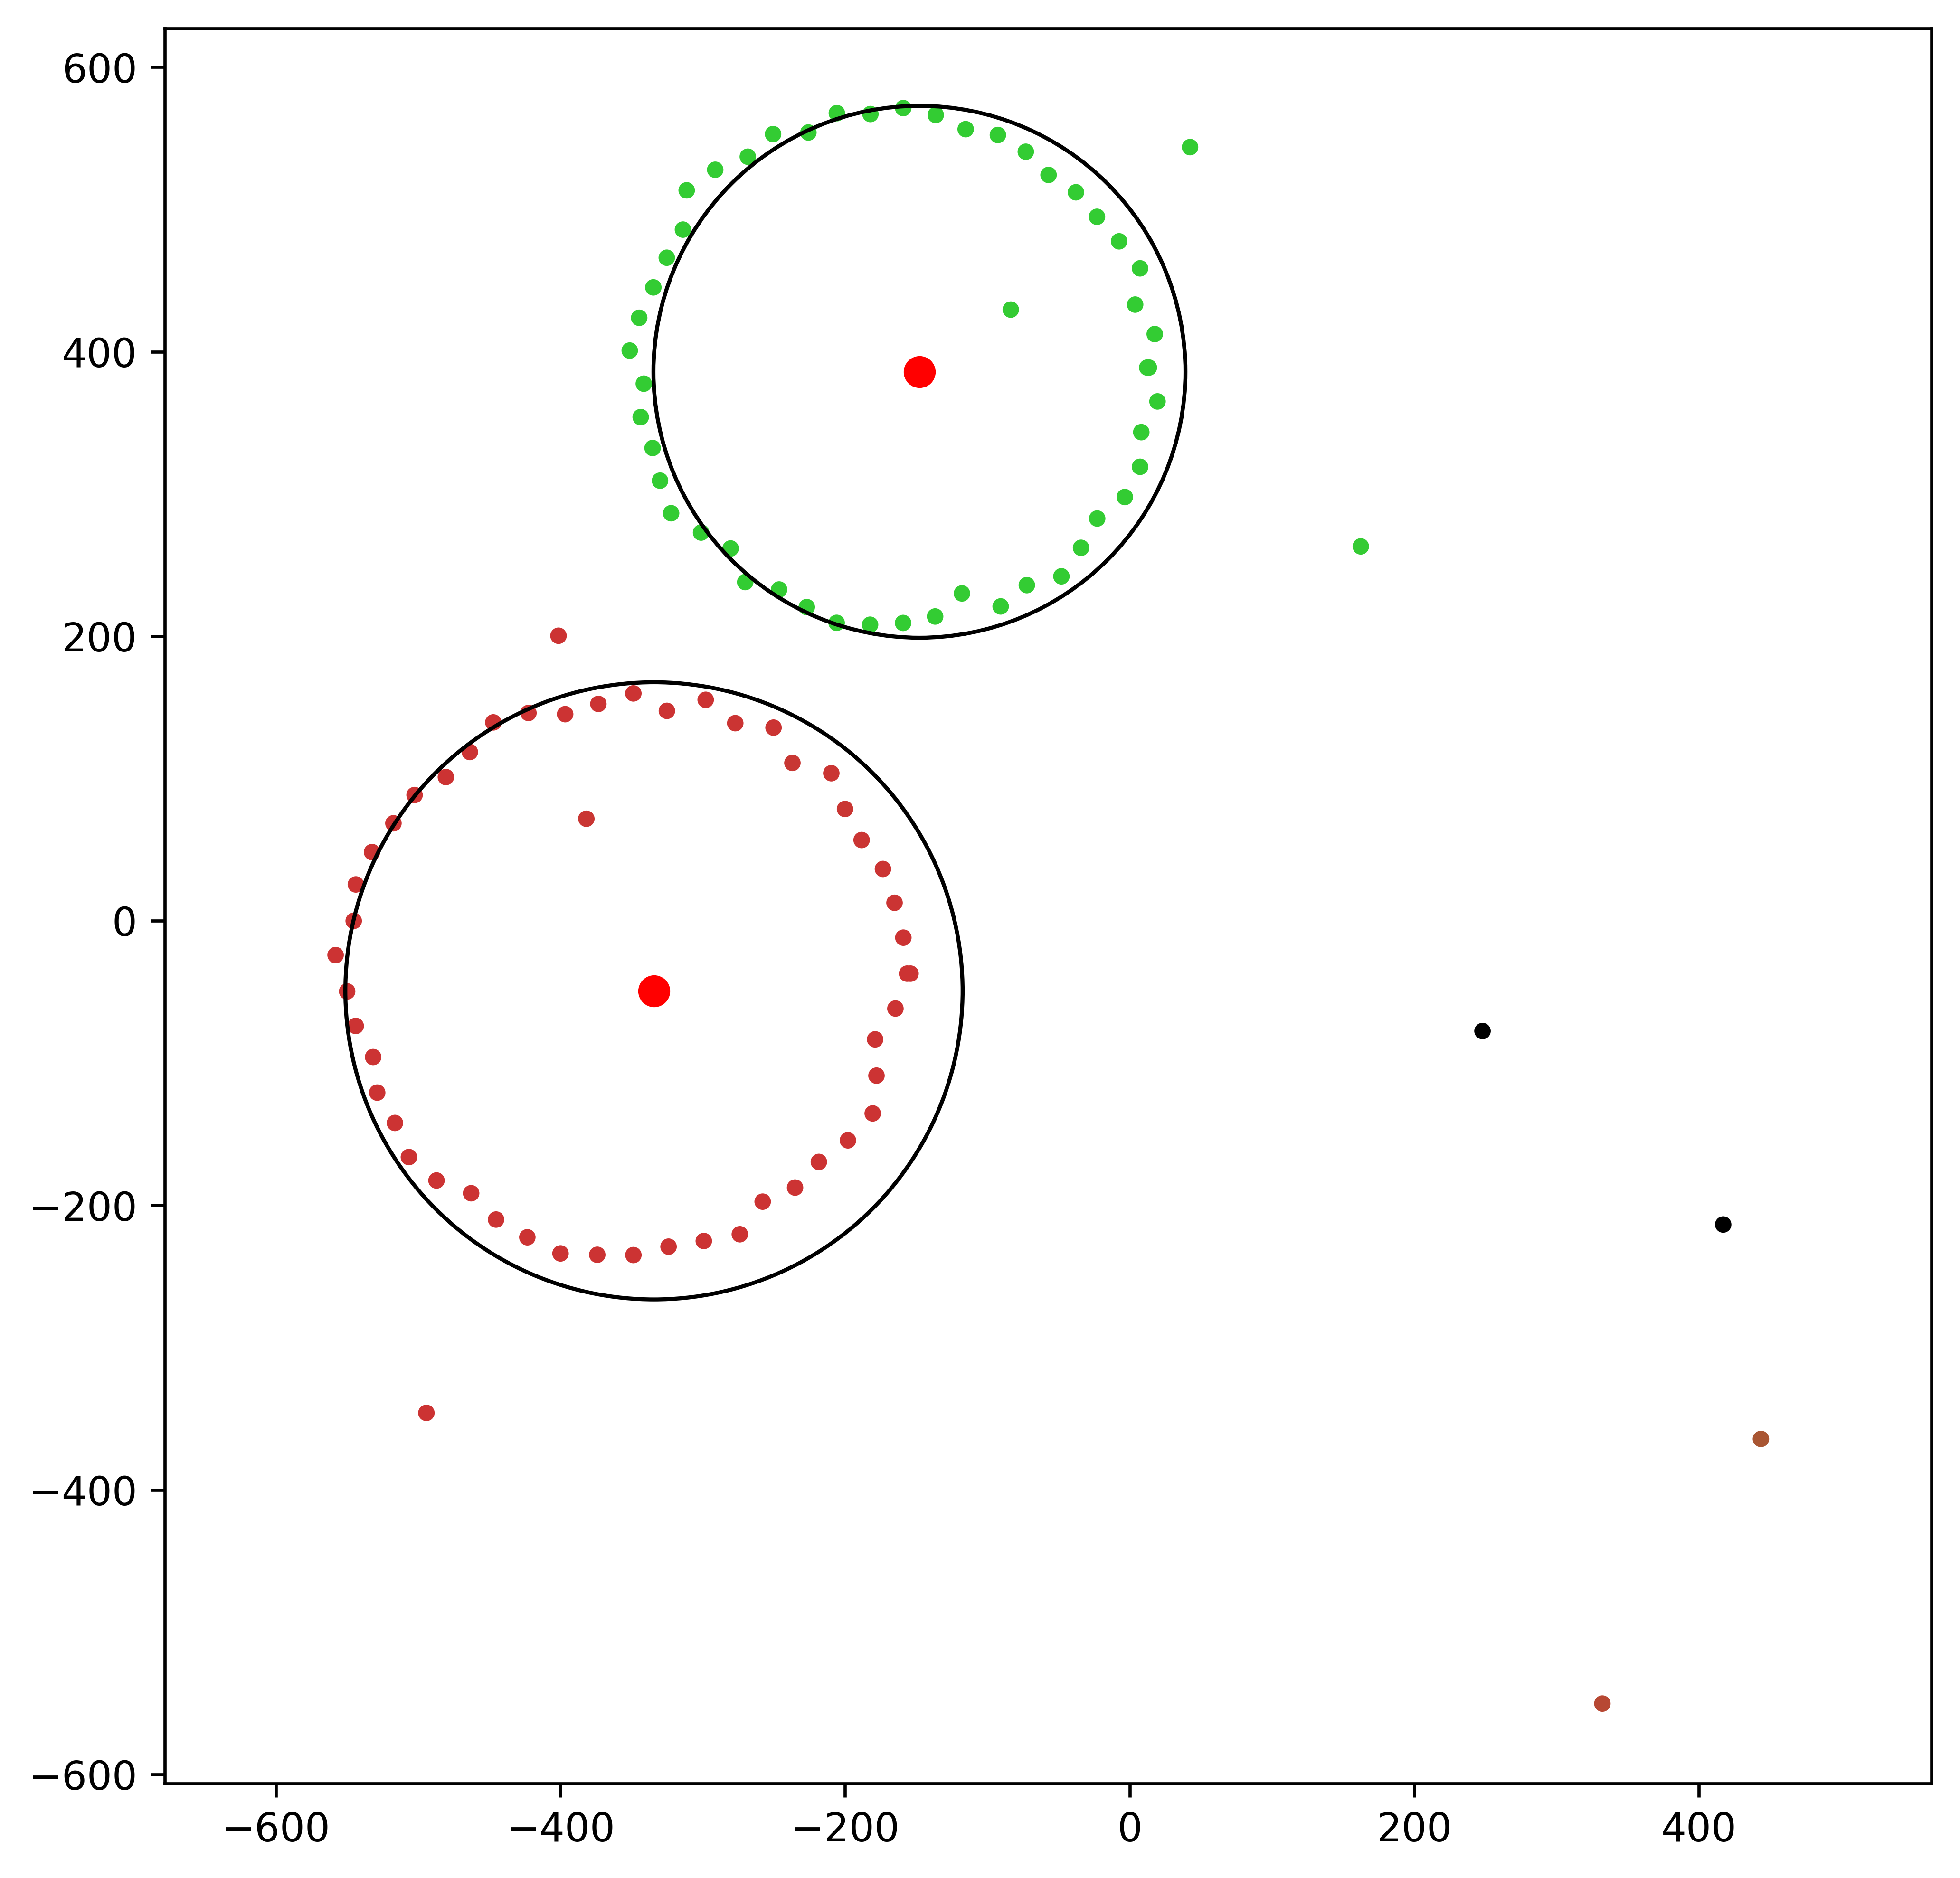

In [7]:
model.fit(data)

# mask = model.prune_noise(threshold=1.5, reestimate_centers_and_radii=False)
# Get the clustering results
# Get the clustering results
radii, centers, memberships = model.get_labels()
n_rings = model.n_rings
# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(n_rings)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < n_rings:
    raise ValueError(
        "Not enough distinct vibrant colors for the number of rings")
plot_results(data, radii, centers, memberships,
             vibrant_colors, show_noise=True)